Imports

In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import io

In [19]:
from google.colab import files

file = files.upload()

Saving output.xlsx to output (2).xlsx


Função para transformar os dados de excel para um dataframe.

In [20]:
def generate_data(x):
    data = pd.read_excel(io.BytesIO(file['output.xlsx']))
    cluster = data[(data['Cluster'] == x)]
    df = pd.DataFrame(columns=['val1', 'val2'])
    df['val1']  = cluster['Quantity']
    df['val2'] = cluster['Price']
    print(cluster)

    return df, cluster

Função para gerar os gráficos com outliers.

In [21]:
def plot_outliers(outliers, inliers, center, df):
    plt.scatter(inliers['Quantity'] , inliers['Price'], label='Inliers')
    plt.scatter(outliers['Quantity'] , outliers['Price'], s=60, color='red', marker='x', label='Outliers')
    plt.scatter(center[:,0] , center[:,1] , s = 80, color='black', marker='^', label='Center')
    plt.ylabel('Price', fontsize=10)
    plt.xlabel('Quantity', fontsize=10)
    plt.title('Cluster ' + str(df['Cluster'].iloc[0]))
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.legend(loc="upper right")
    plt.show()

Função para detecção dos outliers.

In [22]:
def K_means(X, df):
    kmeans = KMeans(n_clusters=1, random_state=0)
    model = kmeans.fit(X)
    center = kmeans.cluster_centers_
    distances = cdist(center, X, 'seuclidean')
    df['Distance'] = np.transpose(distances)
    outliers = df[df['Distance']  >= np.percentile(df['Distance'], 95)]
    inliers = df[df['Distance'] < np.percentile(df['Distance'], 95)]
    print(outliers)
    plot_outliers(outliers, inliers, center, df)

       Unnamed: 0  Cluster  ... Quantity   Price
2437         2437        0  ...     1980    0.29
13369       13369        0  ...       56   26.73
23976       23976        0  ...        3  224.54
24046       24046        0  ...        3  174.26
24060       24060        0  ...        3  170.58
24527       24527        0  ...        3   74.47
24623       24623        0  ...        3   67.60
24624       24624        0  ...        3   67.60
25414       25414        0  ...        3   23.43
26059       26059        0  ...        2  355.47
26337       26337        0  ...        2  186.39
26338       26338        0  ...        2  186.39
26402       26402        0  ...        2  174.26
27453       27453        0  ...        2   90.00
28024       28024        0  ...        2   71.12
28322       28322        0  ...        2   60.29
28323       28323        0  ...        2   60.29
29990       29990        0  ...        2   24.38
31937       31937        0  ...        1  186.39
32139       32139   

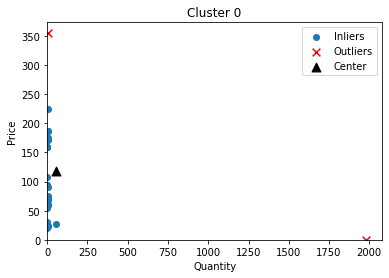

       Unnamed: 0  Cluster  ... Quantity   Price
12706       12706        1  ...       78   24.99
13428       13428        1  ...       50  174.00
13429       13429        1  ...       50  174.00
13430       13430        1  ...       50  174.00
15629       15629        1  ...       30   33.34
15630       15630        1  ...       30   33.34
15631       15631        1  ...       30   33.34
16323       16323        1  ...       25  121.12
17816       17816        1  ...       15  125.03
17817       17817        1  ...       15  121.12
17818       17818        1  ...       15  121.12
18607       18607        1  ...       11  172.00
18611       18611        1  ...       11  125.03
18684       18684        1  ...       10  375.04
18770       18770        1  ...       10  118.63
19859       19859        1  ...        9  121.12
20032       20032        1  ...        8  118.63
20033       20033        1  ...        8  118.63
20630       20630        1  ...        6  375.04
21729       21729   

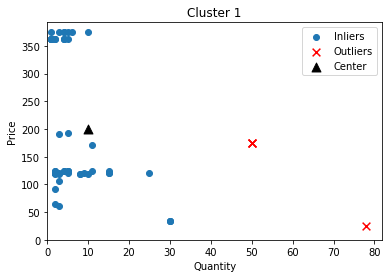

       Unnamed: 0  Cluster  ... Quantity   Price
18955       18955        2  ...       10   49.83
20452       20452        2  ...        7   49.83
20756       20756        2  ...        6  134.74
20757       20757        2  ...        6  134.72
21107       21107        2  ...        6   49.84
21108       21108        2  ...        6   49.84
21109       21109        2  ...        6   49.83
22002       22002        2  ...        5   72.21
24844       24844        2  ...        3   49.83
24845       24845        2  ...        3   49.83
27981       27981        2  ...        2   72.21
28770       28770        2  ...        2   49.84
28771       28771        2  ...        2   49.84
28772       28772        2  ...        2   49.83
28773       28773        2  ...        2   49.83
28774       28774        2  ...        2   49.83
28775       28775        2  ...        2   49.83
28776       28776        2  ...        2   49.83
31326       31326        2  ...        1  289.50
32849       32849   

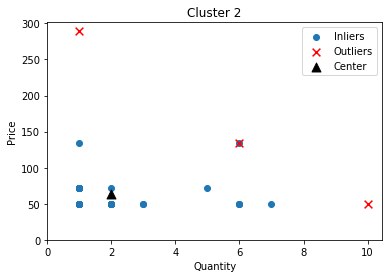

       Unnamed: 0  Cluster  ... Quantity Price
488           488        3  ...     7570  2.89
897           897        3  ...     4380  2.90
902           902        3  ...     4230  2.72
911           911        3  ...     4044  2.73
1185         1185        3  ...     3156  2.73
...           ...      ...  ...      ...   ...
15945       15945        3  ...       30  4.49
15947       15947        3  ...       30  4.45
15949       15949        3  ...       30  4.43
15950       15950        3  ...       30  4.43
18588       18588        3  ...       12  3.14

[162 rows x 6 columns]
      Unnamed: 0  Cluster  ... Price  Distance
488          488        3  ...  2.89  6.789352
897          897        3  ...  2.90  3.693452
902          902        3  ...  2.72  3.610375
911          911        3  ...  2.73  3.432628
1185        1185        3  ...  2.73  2.619142
1220        1220        3  ...  2.74  2.475389
1223        1223        3  ...  2.69  2.502064
1224        1224        3  ...  2.69

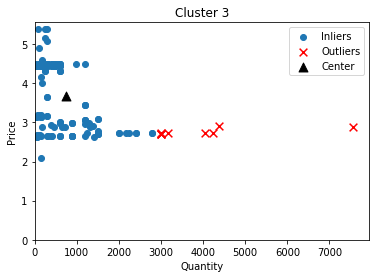

       Unnamed: 0  Cluster  ... Quantity  Price
8292         8292        4  ...      200   6.50
8294         8294        4  ...      200   6.35
9260         9260        4  ...      192   3.10
11391       11391        4  ...      100   2.65
11483       11483        4  ...      100   2.27
12742       12742        4  ...       75   3.30
13019       13019        4  ...       60  11.10
14208       14208        4  ...       50   3.36
14278       14278        4  ...       50   2.92
14950       14950        4  ...       48   3.36
17348       17348        4  ...       20   2.80
18002       18002        4  ...       15   5.20
21514       21514        4  ...        6  13.80
21681       21681        4  ...        6   3.79
21682       21682        4  ...        6   3.79
23783       23783        4  ...        4   3.79
38165       38165        4  ...        1  39.61
38166       38166        4  ...        1  39.61
40544       40544        4  ...        1  17.69

[19 rows x 6 columns]
       Unnamed: 0

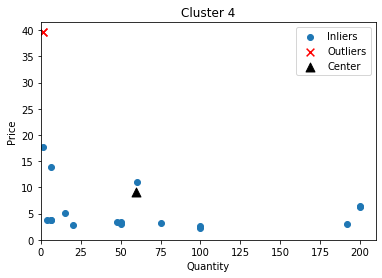

In [23]:
#Se quiser fazer um por um, tira o loop e troca o x na função pelo valor do cluster
for x in range (0, 5):
        df, data = generate_data(x)

        K_means(df, data)